In [35]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import rand
from scipy import signal
from sklearn.cross_decomposition import CCA

channels = ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7'
    , 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz'
    , 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'ACC_X', 'ACC_Y', 'ACC_Z']
removed_channels = ['Fp1', 'F8', 'F7', 'Fp2', 'F3', 'F4']
frequencies_main = ['8.18', '9', '10', '11.25', '12.85', '15']
occ_channels = ['O1', 'O2', 'Oz', 'P3', 'P4', 'Pz', 'P7', 'P8']
frequencies = ['8.18_sin_h1', '8.18_cos_h1', '8.18_sin_h2', '8.18_cos_h2', '8.18_sin_h3', '8.18_cos_h3',
               '9_sin_h1', '9_cos_h1', '9_sin_h2', '9_cos_h2', '9_sin_h3', '9_cos_h3',
               '10_sin_h1', '10_cos_h1', '10_sin_h2', '10_cos_h2', '10_sin_h3', '10_cos_h3',
               '11.25_sin_h1', '11.25_cos_h1', '11.25_sin_h2', '11.25_cos_h2', '11.25_sin_h3', '11.25_cos_h3',
               '12.85_sin_h1', '12.85_cos_h1', '12.85_sin_h2', '12.85_cos_h2', '12.85_sin_h3', '12.85_cos_h3',
               '15_sin_h1', '15_cos_h1', '15_sin_h2', '15_cos_h2', '15_sin_h3', '15_cos_h3'
               ]



In [36]:
def perform_cca(fragment, n_components):
    X = fragment[:][occ_channels]
    freqs = []
    t = 0
    for i in range(0, len(frequencies), 6):
        t = t + 1
        Y = fragment[:][frequencies[i:6 * t]]
        ca = CCA(n_components=2)
        ca.fit(X, Y)
        X_c, Y_c = ca.transform(X, Y)
        freqs.append(np.corrcoef(X_c[:, 0], Y_c[:, 0])[0][1])
    return freqs

def perform_cca_2(fragment):
    n_components = 2
    X = fragment[:][occ_channels]
    freqs = []
    t = 0
    for i in range(0, len(frequencies), 6):
        t = t + 1
        Y = fragment[:][frequencies[i:6 * t]]
        ca = CCA(n_components=n_components)
        ca.fit(X, Y)
        X_c, Y_c = ca.transform(X, Y)
        p1 = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0][1]
        p2 = np.corrcoef(X_c[:, 1], Y_c[:, 1])[0][1]
        freqs.append(np.sqrt(p1**2+p2**2))
        if False:
            plt.scatter(X_c[:, 0], Y_c[:, 0], label='EEG Channels', alpha=0.7)
            plt.scatter(X_c[:, 1], Y_c[:, 1], label='Sine curves', alpha=0.7)
            plt.xlabel('X Transformed')
            plt.ylabel('Y Transformed')
            plt.title('CCA Transformed Canonical Variates')
            plt.legend()
            plt.show()
    return freqs

def add_padding(data, lenght=100):
    return padding(data, lenght)

def remove_padding(data, length=100):
    return data[length:-length]

def padding(data, pad_length = 100):
    return np.pad(data, (pad_length, pad_length), mode="reflect")

def get_freqs(N):
    # fs = [8.18, 9, 10, 11.25, 12.86, 15]
    fs = [13.0909, 14.4, 16, 18, 20.5714, 24]
    t = N / 250
    return_freqs = []
    for fk in fs:
        for i in range(1, 4):
            return_freqs.append(np.sin(2 * np.pi * i * (t * fk)).tolist())
            return_freqs.append(np.cos(2 * np.pi * i * (t * fk)).tolist())

    df = pd.DataFrame(return_freqs)
    df = df.T
    df.columns = frequencies
    return df

In [42]:

fs = 250  # Sampling frequency (Hz)
duration = 5  # Duration of the simulated EEG signal (seconds)
t = np.arange(0, duration, 1/fs)  # Time vector
N = np.arange(0, duration*fs, 1)
base_frequency = 16  # Frequency of the sinusoidal component (Hz)
noise_amplitude = 0.5  # Amplitude of the random noise component

eeg_signal = np.sin(2 * np.pi * base_frequency * t) + noise_amplitude * np.random.randn(len(t))
df = pd.DataFrame([eeg_signal, eeg_signal]).T
df.columns = ['EEG', 'EEG2']
frs = get_freqs(N)
n_components = 2
print(df.shape)
print(frs.shape)
X = df[:][['EEG', 'EEG2']]
freqs = []
h = 0
for y in range(0, len(frequencies), 6):
    h = h + 1
    Y = frs[:][frequencies[y:6 * h]]
    ca = CCA(n_components=n_components)
    ca.fit(X, Y)
    X_c, Y_c = ca.transform(X, Y)
    p1 = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0][1]
    p2 = np.corrcoef(X_c[:, 1], Y_c[:, 1])[0][1]
    freqs.append(np.sqrt(p1**2+p2**2))

print(freqs)

(1250, 2)
(1250, 36)
[0.04373408817899489, 0.016366454416485366, 0.8169568273751797, 0.03367774994612988, 0.055768261839100934, 0.026156315687248858]


Text(0.5, 1.0, 'Signal with Two Sinusoids of Different Frequencies and Phase Shifts')

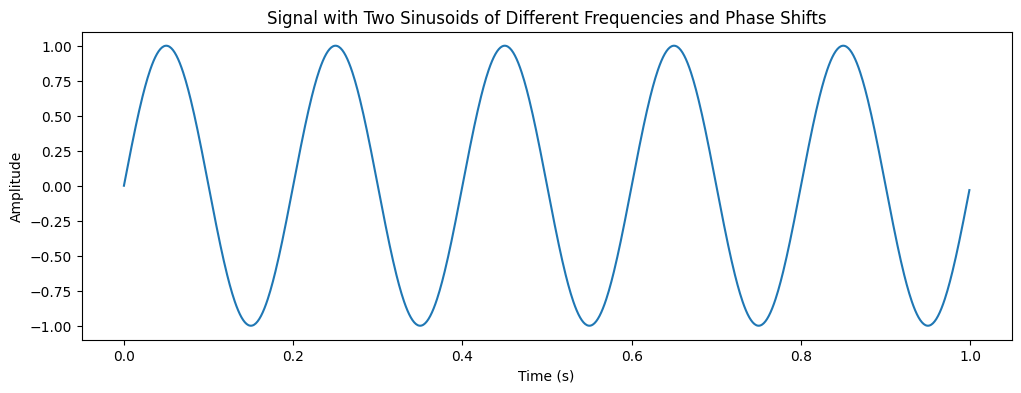

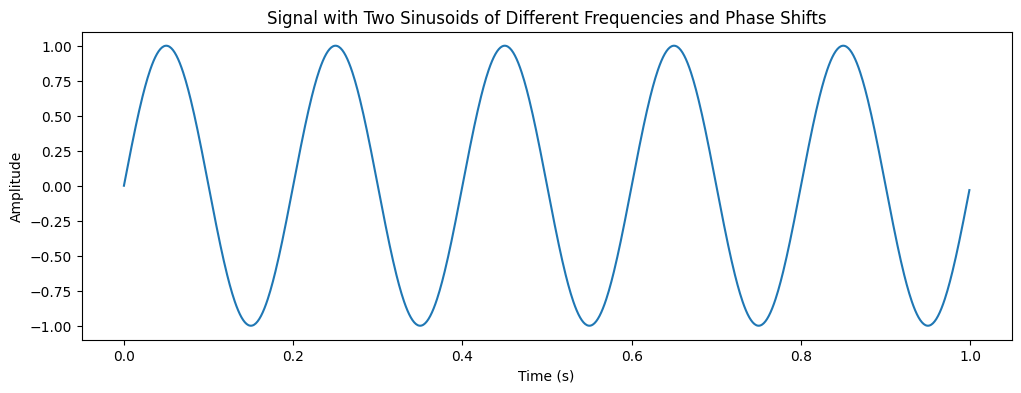

In [53]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency (Hz)
duration = 1  # Duration of the signal (seconds)

t = np.arange(0, duration, 1/fs)  # Time vector

# Define the sinusoidal components
freq1 = 5  # Frequency of the first sinusoid (Hz)
phase_shift1 = 0  # Phase shift of the first sinusoid (radians)

freq2 = 5  # Frequency of the second sinusoid (Hz)
phase_shift2 = 0# Phase shift of the second sinusoid (radians)

# Create the two sinusoidal components
sin1 = np.sin(2 * np.pi * freq1 * t + phase_shift1)
sin2 = np.sin(2 * np.pi * freq1 * t + phase_shift2)

# Combine the sinusoids to create the final signal
signal = sin1
# Plot the combined signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal with Two Sinusoids of Different Frequencies and Phase Shifts")

plt.figure(figsize=(12, 4))
plt.plot(t, sin2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal with Two Sinusoids of Different Frequencies and Phase Shifts")
